## 3.5 Gene expression analysis using DESeq2

#### First use `git` to retrieve the gene counts files (total n=6). The path to files on the Github repo is:
`Applied-Bioinformatics/Unit2-RNAseq/data/htseq_out/day5/`  
  
Then copy to a directory where you can find it (e.g. your homework folder).
#### Locate counts files 
```R
dir_counts <- "/mnt/c/Users/Jerry/Applied-Bioinformatics-HW/data/htseq_out/day5"
counts_files <- list.files(dir_counts)
counts_files
```

In [4]:
dir_counts <- "~/ABABhwk/Unit2-RNAseq/data/htseq_out/day5"
counts_files <- list.files(dir_counts)
counts_files

[1] "GSM2580321_counts.txt" "GSM2580322_counts.txt" "GSM2580325_counts.txt"
[4] "GSM2580326_counts.txt" "GSM2580329_counts.txt" "GSM2580330_counts.txt"

#### Prepare a sample table in the format required by DESeq2
Here we specify the group assignment manually. It is also possible to parse the sample data matrix from GEO, which can be found by following a link on the data series page: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE97919
```
samplesInfo <- as.data.frame(matrix(ncol=2, nrow=length(counts_files)))  
samplesInfo$samplename <- counts_files  
samplesInfo$filename <- counts_files  
samplesInfo$group <- c("mock", "ZIKV", "mock", "ZIKV", "mock", "ZIKV") 
#Remove the blank columns
samplesInfo <- samplesInfo[,-c(1:2)]
```

In [5]:
samplesInfo <- as.data.frame(matrix(ncol=2, nrow=length(counts_files)))  
samplesInfo$samplename <- counts_files  
samplesInfo$filename <- counts_files  
samplesInfo$group <- c("mock", "ZIKV", "mock", "ZIKV", "mock", "ZIKV") 
#Remove the blank columns
samplesInfo <- samplesInfo[,-c(1:2)]

#### Check the sample table and make any corrections above if necessary

In [6]:
samplesInfo

samplename,filename,group
GSM2580321_counts.txt,GSM2580321_counts.txt,mock
GSM2580322_counts.txt,GSM2580322_counts.txt,ZIKV
GSM2580325_counts.txt,GSM2580325_counts.txt,mock
GSM2580326_counts.txt,GSM2580326_counts.txt,ZIKV
GSM2580329_counts.txt,GSM2580329_counts.txt,mock
GSM2580330_counts.txt,GSM2580330_counts.txt,ZIKV


#### Load DESeq2 package
```
library("DESeq2")
```

In [7]:
library("DESeq2")
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo, 
                                           directory = dir_counts, 
                                           design = ~ group)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

#### Import data into R
```
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo, 
                                           directory = dir_counts, 
                                           design = ~ group)
```

#### Check the data imported correctly
```R
colData(dds1)
```

In [8]:
colData(dds1)

DataFrame with 6 rows and 1 column
                         group
                      <factor>
GSM2580321_counts.txt     mock
GSM2580322_counts.txt     ZIKV
GSM2580325_counts.txt     mock
GSM2580326_counts.txt     ZIKV
GSM2580329_counts.txt     mock
GSM2580330_counts.txt     ZIKV

In [9]:
#### Run the main DESeq normalization and analysis function
dds1_deseq <- DESeq(dds1)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


#### Run additional DESeq2 normalization functions
```
rld <- rlog(dds1_deseq)
vsd <- varianceStabilizingTransformation(dds1_deseq)
```

In [10]:
rld <- rlog(dds1_deseq)
vsd <- varianceStabilizingTransformation(dds1_deseq)

#### Plot a dendrogram of sample transcriptomes
```
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))
```

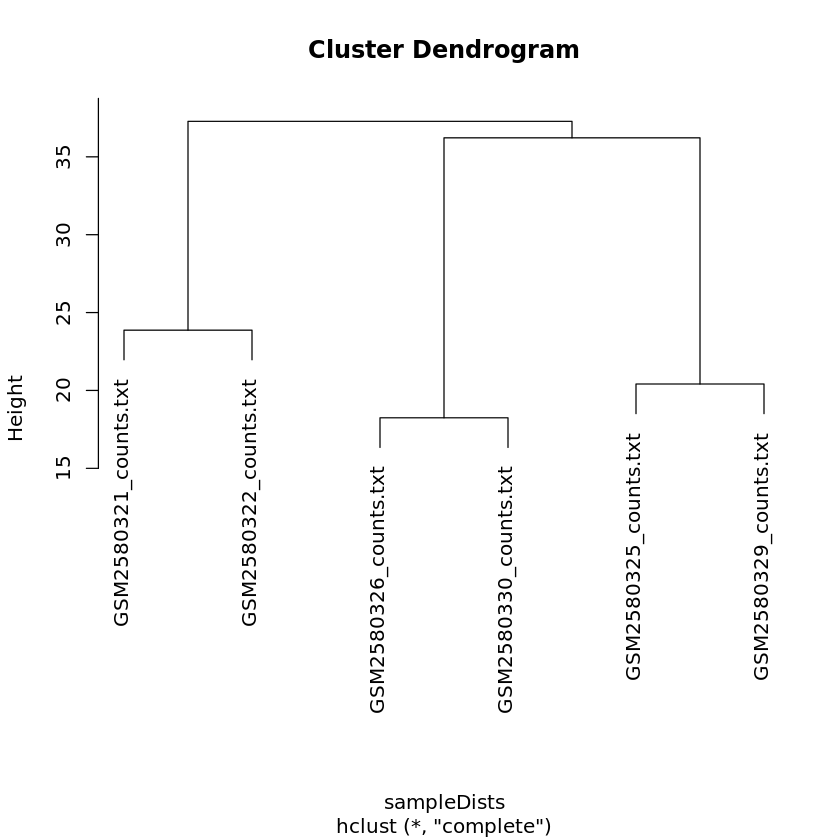

In [13]:
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))

#### Principal component plot
```
plotPCA(rld, intgroup="group")
```

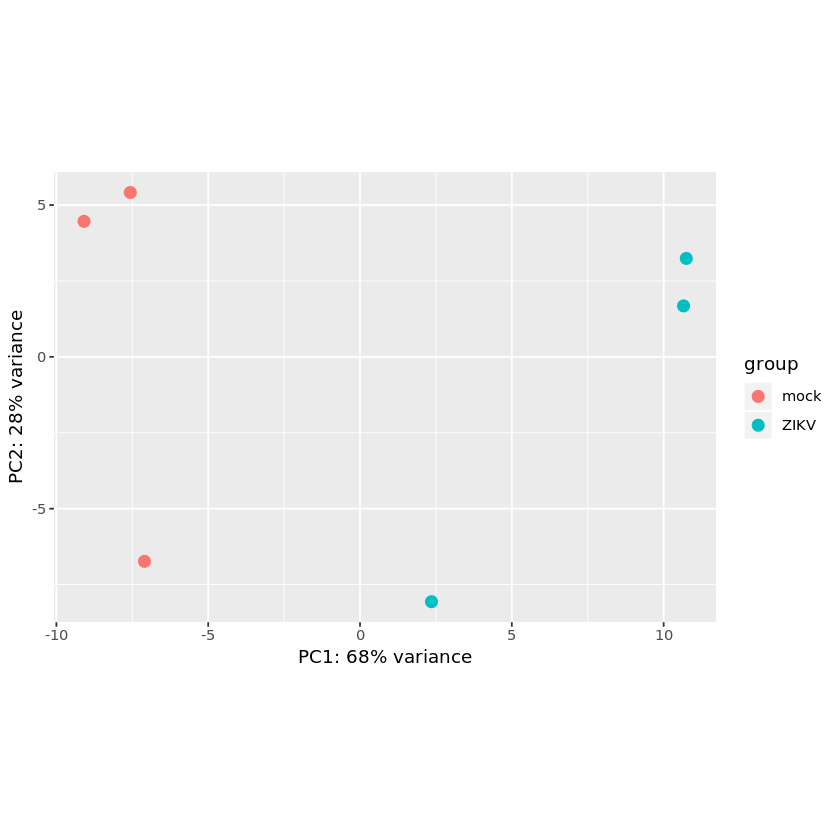

In [14]:
plotPCA(rld, intgroup="group")

#### Exercises
1) Repeat the hierarchical clustering using rlog-normalized counts instead of vsd.  
2) Examine the normalized counts using `head(assay(vsd))` and `head(assay(rld))`. Now find the corresponding raw counts and plot raw vs normalized counts for the first 6 genes of the first sample. HINT: It is possible to extract elements from `dds1`, including raw counts. 

__Ex1__

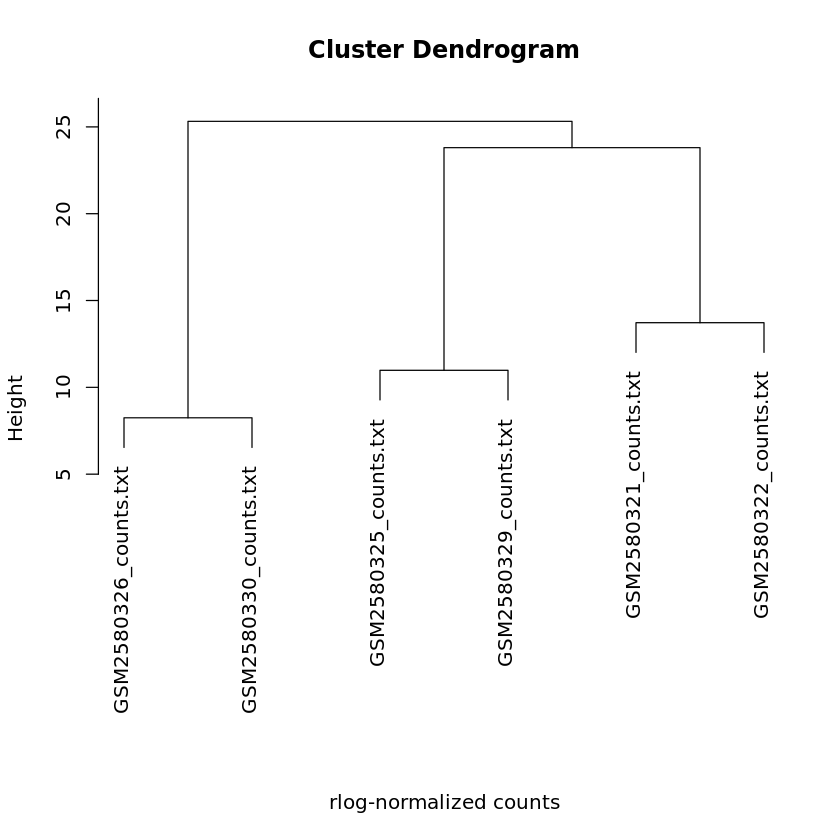

In [11]:
sampleDists <- dist(t(assay(rld)))
plot(hclust(sampleDists),  sub="", xlab="rlog-normalized counts")

__Ex2__

In [12]:
head(assay(rld))

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.196400,10.023089,10.174652,9.993077,10.083330,9.907646
ENSG00000000005,2.676528,2.660318,2.676352,2.673159,2.684178,2.683126
ENSG00000000419,9.678357,9.642043,9.723210,9.718201,9.595488,9.637684
ENSG00000000457,8.948427,8.944546,8.971803,8.925087,8.976021,9.020144
ENSG00000000460,8.804478,8.736000,8.796664,8.673613,8.718284,8.741717
ENSG00000000938,3.406843,3.427683,3.407161,3.483110,3.382641,3.507155


In [13]:
head(assay(vsd))

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.581357,10.351161,10.553683,10.310977,10.430818,10.198426
ENSG00000000005,7.540721,7.459429,7.540137,7.525655,7.567040,7.566943
ENSG00000000419,10.111723,10.063724,10.171572,10.164507,10.005112,10.058310
ENSG00000000457,9.572357,9.567153,9.603058,9.541456,9.607789,9.665374
ENSG00000000460,9.526257,9.436839,9.517174,9.354339,9.415392,9.444421
ENSG00000000938,7.514667,7.597282,7.508626,7.764065,7.429404,7.814814


In [21]:
head(assay(dds1))

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,1138,880,930,833,2113,919
ENSG00000000005,6,3,5,5,15,8
ENSG00000000419,754,680,666,731,1443,809
ENSG00000000457,447,419,386,400,979,554
ENSG00000000460,426,365,353,327,799,440
ENSG00000000938,5,8,4,17,5,25


In [14]:
raw=data.frame(head(assay(dds1)))
normvsd=data.frame(head(assay(vsd)))
normlog=data.frame(head(assay(rld)))

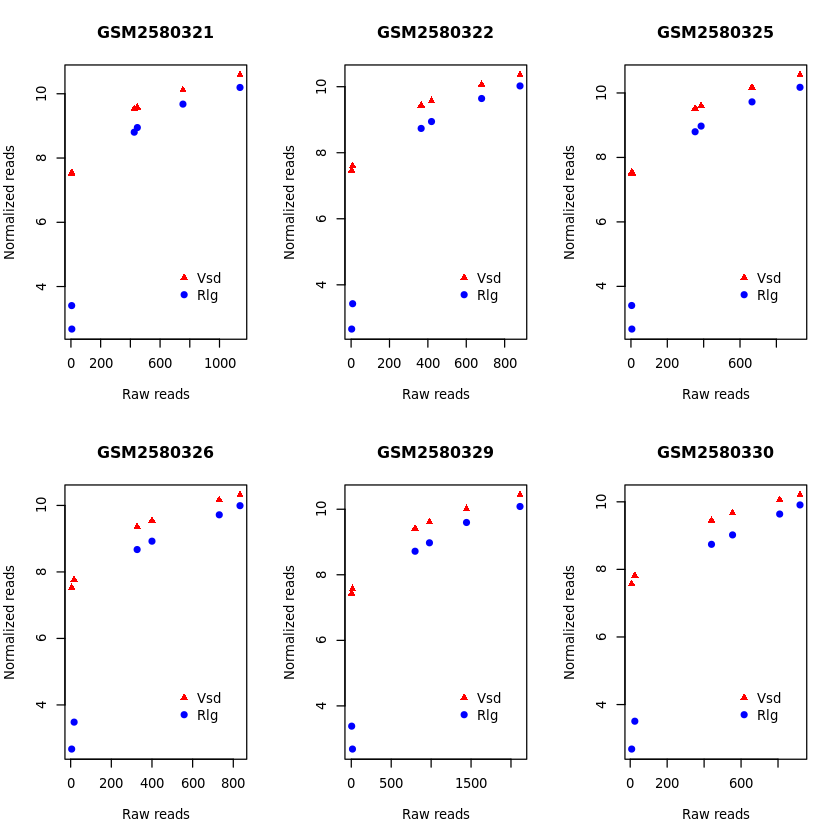

In [36]:
par(mfrow=c(2,3))
matplot(main="GSM2580321", raw$GSM2580321_counts.txt, 
        cbind(normvsd$GSM2580321_counts.txt, normlog$GSM2580321_counts.txt), 
        col=c("red", "blue"), pch=c(17,19),  
        xlab="Raw reads", ylab="Normalized reads")
legend("bottomright", legend = c("Vsd", "Rlg"), col = c("red", "blue"), pch = c(17,19), bty = "n", pt.cex = 1,   cex = 1, 
  text.col = "black", horiz = F , inset = c(0.1, 0.1))
matplot(main="GSM2580322", raw$GSM2580322_counts.txt, 
        cbind(normvsd$GSM2580322_counts.txt, normlog$GSM2580322_counts.txt), 
        col=c("red", "blue"), pch=c(17,19),  
        xlab="Raw reads", ylab="Normalized reads")
legend("bottomright", legend = c("Vsd", "Rlg"), col = c("red", "blue"), pch = c(17,19), bty = "n", pt.cex = 1,   cex = 1, 
  text.col = "black", horiz = F , inset = c(0.1, 0.1))
matplot(main="GSM2580325", raw$GSM2580325_counts.txt, 
        cbind(normvsd$GSM2580325_counts.txt, normlog$GSM2580325_counts.txt), 
        col=c("red", "blue"), pch=c(17,19),  
        xlab="Raw reads", ylab="Normalized reads")
legend("bottomright", legend = c("Vsd", "Rlg"), col = c("red", "blue"), pch = c(17,19), bty = "n", pt.cex = 1,   cex = 1, 
  text.col = "black", horiz = F , inset = c(0.1, 0.1))
matplot(main="GSM2580326", raw$GSM2580326_counts.txt, 
        cbind(normvsd$GSM2580326_counts.txt, normlog$GSM2580326_counts.txt), 
        col=c("red", "blue"), pch=c(17,19),  
        xlab="Raw reads", ylab="Normalized reads")
legend("bottomright", legend = c("Vsd", "Rlg"), col = c("red", "blue"), pch = c(17,19), bty = "n", pt.cex = 1,   cex = 1, 
  text.col = "black", horiz = F , inset = c(0.1, 0.1))
matplot(main="GSM2580329", raw$GSM2580329_counts.txt, 
        cbind(normvsd$GSM2580329_counts.txt, normlog$GSM2580329_counts.txt), 
        col=c("red", "blue"), pch=c(17,19),  
        xlab="Raw reads", ylab="Normalized reads")
legend("bottomright", legend = c("Vsd", "Rlg"), col = c("red", "blue"), pch = c(17,19), bty = "n", pt.cex = 1,   cex = 1, 
  text.col = "black", horiz = F , inset = c(0.1, 0.1))
matplot(main="GSM2580330", raw$GSM2580330_counts.txt, 
        cbind(normvsd$GSM2580330_counts.txt, normlog$GSM2580330_counts.txt), 
        col=c("red", "blue"), pch=c(17,19),  
        xlab="Raw reads", ylab="Normalized reads")
legend("bottomright", legend = c("Vsd", "Rlg"), col = c("red", "blue"), pch = c(17,19), bty = "n", pt.cex = 1,   cex = 1, 
  text.col = "black", horiz = F , inset = c(0.1, 0.1))